In [23]:
import TIdatabase as ti
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
df = pd.read_csv("collegedata_normalized.csv", index_col=0)
df.head()

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,schooltype,...,alumni,outofstate,acceptStatus,acceptProb,name,acceptrate,size,public,finAidPct,instatePct
0,S50C3UECT8,NaN,0.838909,7.0,1.067927,3.0,-0.188104,0.059072,Biomedical engineering,0.0,...,0.0,0.0,1.0,NaN,Rice,0.151,6621,0,0.0,0
1,GBWZQQRBEV,NaN,0.666993,7.0,0.661638,2.0,0.493061,0.398012,Classics,0.0,...,0.0,1.0,1.0,NaN,Rice,0.151,6621,0,0.0,0
2,MXXLWO1HQ2,NaN,0.208552,0.0,NaN,3.0,0.395752,-1.035963,Biological Science,1.0,...,0.0,1.0,0.0,NaN,Rice,0.151,6621,0,0.0,0
3,5KSL7C8SLZ,NaN,1.297350,7.0,0.864783,4.0,0.103824,-0.384156,Physics,1.0,...,0.0,1.0,0.0,NaN,Rice,0.151,6621,0,0.0,0
4,RQWLNGGZ49,NaN,0.323162,1.0,-0.354087,2.0,0.541716,NaN,NaN,1.0,...,0.0,1.0,1.0,NaN,Rice,0.151,6621,0,0.0,0


In [25]:
x = df.isnull().sum(axis=1).tolist()
y = float(sum(x)) / (df.shape[0]*df.shape[1])
print ('Fraction nulls = ', y)

Fraction nulls =  0.2325930745107786


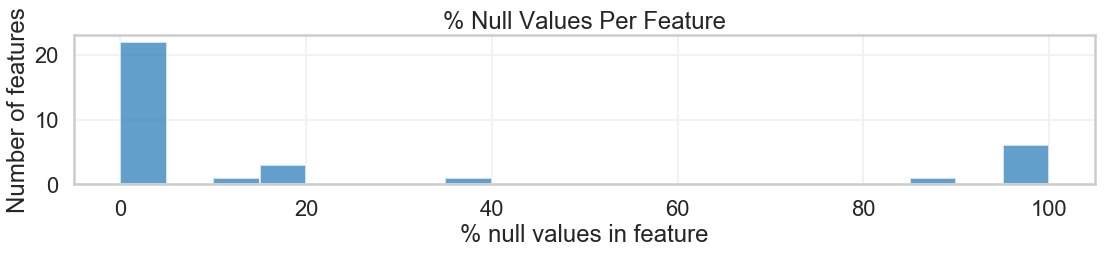

In [26]:
percentnulls = {}
for i in range(len(df.columns)):
    percentnulls[df.columns[i]] = 100.0 * df[df.columns[i]].isnull().sum() / len(df[df.columns[i]])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (16,4))
plt.hist(percentnulls.values(),bins=20,alpha=0.7,edgecolor="white")
plt.xlabel("% null values in feature")
plt.ylabel("Number of features")
plt.title("% Null Values Per Feature")
plt.gca().xaxis.grid(True,color='0.95')
plt.gca().yaxis.grid(True,color='0.95')
plt.tight_layout()
plt.show()

In [27]:
[i for i in percentnulls.keys() if percentnulls[i] > 20 and percentnulls[i] < 80]

['addInfo']

In [28]:
cols_to_drop = []
for i in df.columns:
    if 1.0* df[i].isnull().sum() / len(df[i]) >= 0.5:
        cols_to_drop.append(i)
print("Columns to drop: ", cols_to_drop)
dfr = df.drop(cols_to_drop,axis=1)

Columns to drop:  ['classrank', 'canAfford', 'firstinfamily', 'artist', 'workexp', 'visited', 'acceptProb']


In [29]:
dfr = dfr[pd.notnull(df["acceptStatus"])]

In [30]:
x = dfr.isnull().sum(axis=1).tolist()
y = float(sum(x)) / (dfr.shape[0]*dfr.shape[1])
print ('Fraction nulls = ', y)

Fraction nulls =  0.03153017781116955


In [31]:
print(dfr.columns)
predictor_cols = ["admissionstest","AP","averageAP","SATsubject","GPA","schooltype","intendedgradyear","female","MinorityRace","international","sports","earlyAppl","alumni","outofstate","acceptrate","size","public"]
dfpredict = dfr[predictor_cols]
dfresponse = dfr["acceptStatus"]

Index(['studentID', 'admissionstest', 'AP', 'averageAP', 'SATsubject', 'GPA',
       'GPA_w', 'program', 'schooltype', 'intendedgradyear', 'addInfo',
       'female', 'MinorityGender', 'MinorityRace', 'international', 'sports',
       'collegeID', 'earlyAppl', 'alumni', 'outofstate', 'acceptStatus',
       'name', 'acceptrate', 'size', 'public', 'finAidPct', 'instatePct'],
      dtype='object')


In [32]:
dfpredict.columns

Index(['admissionstest', 'AP', 'averageAP', 'SATsubject', 'GPA', 'schooltype',
       'intendedgradyear', 'female', 'MinorityRace', 'international', 'sports',
       'earlyAppl', 'alumni', 'outofstate', 'acceptrate', 'size', 'public'],
      dtype='object')

In [33]:
print(dfpredict.dropna(axis=0,how="any").shape)
print(dfpredict.shape)

(10917, 17)
(13310, 17)


In [34]:
imp = Imputer(missing_values="NaN", strategy="median", axis=1)
imp.fit(dfpredict)
X = imp.transform(dfpredict)
y = dfresponse
X.shape, y.shape

c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


((13310, 17), (13310,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10648, 17) (2662, 17) (10648,) (2662,)


In [37]:
# predict all accepted
print ('Accuracy when predicting all accepted = ', metrics.accuracy_score(y_test, np.ones(y_test.shape)))
# predict all rejected
print ('Accuracy when predicting all rejected = ', metrics.accuracy_score(y_test,np.zeros(y_test.shape)))

Accuracy when predicting all accepted =  0.3786626596543952
Accuracy when predicting all rejected =  0.6213373403456048


In [38]:
cdict = {}
for c in [0.001,0.01,0.1,1,10,100,1000]:
    clf = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    cdict[c] = scores.mean()

c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\si

In [39]:
print(cdict)
best_c = max(cdict, key=cdict.get)
print('Best parameter: ', best_c, cdict[best_c])
clflog = linear_model.LogisticRegression(C=best_c)
clflog.fit(X_train,y_train)
predicted = clflog.predict(X_test)
print ('Accuracy on test set: ',metrics.accuracy_score(y_test, predicted))

{0.001: 0.6600283586598659, 0.01: 0.6681061222509631, 0.1: 0.6676364622682077, 1: 0.6679181965127228, 10: 0.6679181965127228, 100: 0.6679181965127228, 1000: 0.6679181965127228}
Best parameter:  0.01 0.6681061222509631
Accuracy on test set:  0.6562734785875282


c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
ntdict = {}
for nt in [100,250,500,1000,2500]:
    clf = RandomForestClassifier(n_estimators=nt,criterion="gini")
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    ntdict[nt] = scores.mean()

In [41]:
print(ntdict)
best_nt = max(ntdict, key=ntdict.get)
print ('Best parameter: ',best_nt, ntdict[best_nt])
clfRF_gini = RandomForestClassifier(n_estimators=nt)
clfRF_gini.fit(X_train,y_train)
predicted = clfRF_gini.predict(X_test)
print ('Accuracy on test set: ',metrics.accuracy_score(y_test,predicted))

{100: 0.7428624163959803, 250: 0.7440828972582954, 500: 0.7447410563270023, 1000: 0.7442707788928656, 2500: 0.7438018686725016}
Best parameter:  500 0.7447410563270023
Accuracy on test set:  0.7411720510894064


In [42]:
ntdict = {}
# We added 5000 because a few times, the optimal number of trees was on the edge
for nt in [250,500,1000,2500,5000]:
    clf = RandomForestClassifier(n_estimators=nt,criterion="entropy")
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    ntdict[nt] = scores.mean()
print (ntdict)
best_nt = max(ntdict, key=ntdict.get)
print ('Best parameter: ',best_nt, ntdict[best_nt])
clfRF_ent = RandomForestClassifier(n_estimators=nt)
clfRF_ent.fit(X_train,y_train)
predicted = clfRF_ent.predict(X_test)
print ('Accuracy on test set: ',metrics.accuracy_score(y_test,predicted))

{250: 0.7425809908771559, 500: 0.7443653812652019, 1000: 0.7464313735867529, 2500: 0.7461496393422379, 5000: 0.7442713522405766}
Best parameter:  1000 0.7464313735867529
Accuracy on test set:  0.7407963936889557


In [43]:
# create interpretable labels for the columns to make the plots more clear for general public
better_labels = {
    "admissionstest": "ACT/SAT score",
    "acceptrate": "College acceptance rate",
    "GPA": "GPA",
    "averageAP": "Average AP score",
    "intendedgradyear": "College graduation year",
    "size": "College size",
    "AP": "# AP exams taken",
    "SATsubject": "# SAT subject tests taken",
    "female": "Gender / Female",
    "schooltype": "Private High School",
    "MinorityRace": "Underrepresented Minority",
    "earlyAppl": "Early Application",
    "outofstate": "Out of State",
    "public": "Public College",
    "alumni": "Legacy",
    "international": "International Student",
    "sports": "Varsity Sports"
    }

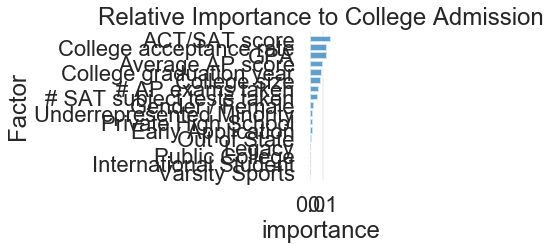

In [44]:
# create dictionary of feature importances and plot
clf=clfRF_gini
feature_importance = {}
for i in range(len(dfpredict.columns)):
    feature_importance[better_labels[dfpredict.columns[i]]] = clf.feature_importances_[i]
# plot sorted importances
sns.set_style("white")
plt.barh(range(len(dfpredict.columns)),sorted(feature_importance.values()), align="center",alpha=0.7,edgecolor='white')
plt.ylim([-1,17])
plt.yticks(range(len(dfpredict.columns)), sorted(feature_importance,key=feature_importance.get))
plt.ylabel("Factor")
plt.xlabel("importance")
plt.title("Relative Importance to College Admission")
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(True,color='0.95')
plt.tight_layout()
sns.despine(left=True,bottom=True)
plt.savefig("features.png")
plt.show()


In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predicted = dt.predict(X_test)
print ('Accuracy on test test:', metrics.accuracy_score(y_test, predicted))

Accuracy on test test: 0.6675432006010519


In [46]:
kdict = {}
for k in [10,15,20,25,30,35]:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    kdict[k] = scores.mean()
print (kdict)
best_k = max(kdict, key=kdict.get)
print ('Best parameter: ',best_k, kdict[best_k])
clfknn = KNeighborsClassifier(n_neighbors=best_k)
clfknn.fit(X_train,y_train)
predicted = clfknn.predict(X_test)
print ('Accuracy on test set: ', metrics.accuracy_score(y_test,predicted))

{10: 0.6929931176222829, 15: 0.6955292109632903, 20: 0.7004116636565911, 25: 0.6990034775743863, 30: 0.7027603605033993, 35: 0.6989097131717815}
Best parameter:  30 0.7027603605033993
Accuracy on test set:  0.7013523666416228


In [47]:
cdict = {}
for c in [0.0001,0.001,0.01,0.1,1,10]:
    clf = svm.LinearSVC(loss="hinge",C=c);
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    cdict[c] = scores.mean()
print (cdict)
best_c = max(cdict, key=cdict.get)
print ('Best parameter: ', best_c, cdict[best_c])
clf = svm.LinearSVC(loss="hinge",C=best_c);
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)
print ('Accuracy on test set: ',metrics.accuracy_score(y_test,predicted))

c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packa

{0.0001: 0.5330740037532223, 0.001: 0.5873463042227058, 0.01: 0.5732402304857798, 0.1: 0.5794589802790439, 1: 0.5744615052141564, 10: 0.571759449762612}
Best parameter:  0.001 0.5873463042227058
Accuracy on test set:  0.49586776859504134


c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
cdict = {}
for c in [0.001,0.01,0.1,1,10,100,1000]:
    clf = svm.SVC(C=c);
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    cdict[c] = scores.mean()
print (cdict)
best_c = max(cdict, key=cdict.get)
print ('Best parameter: ',best_c, cdict[best_c])
clfsvm = svm.SVC(C=best_c);
clfsvm.fit(X_train,y_train)
predicted = clfsvm.predict(X_test)
print ('Accuracy on test set: ',metrics.accuracy_score(y_test,predicted))

c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

{0.001: 0.6191772901381988, 0.01: 0.6191772901381988, 0.1: 0.6841650182919972, 1: 0.7118696207304891, 10: 0.6949652132302189, 100: 0.6494167510149357, 1000: 0.6324175206239787}
Best parameter:  1 0.7118696207304891


c:\users\raghu\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on test set:  0.7118707738542449


In [49]:
from sklearn.ensemble import AdaBoostClassifier
ndict={}
for n in [50,100,150,200,250]:
    clf = AdaBoostClassifier(n_estimators=n);
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    ndict[n] = scores.mean()
print (ndict)
best_n = max(ndict, key=ndict.get)
print ('Best parameter: ',best_n, ndict[best_n])
clfada = AdaBoostClassifier(n_estimators=best_n);
clfada.fit(X_train,y_train)
predicted = clfada.predict(X_test)
print ('Accuracy on test set: ', metrics.accuracy_score(y_test,predicted))

{50: 0.7331897758872005, 100: 0.7321561181713736, 150: 0.732720160008115, 200: 0.7341287430233507, 250: 0.7334712014060251}
Best parameter:  200 0.7341287430233507
Accuracy on test set:  0.736664162283997


In [54]:
index_igy = [index for index,value in enumerate(dfpredict.columns) if value == "intendedgradyear"]
select = [i for i in range(X_train.shape[1]) if i not in index_igy]

In [55]:
X_train1 = X_train[:,select]
X_test1 = X_test[:,select]
y_train1=y_train
y_test1=y_test
print ('Random Forest: ')
ntdict = {}
for nt in [5,10,25,50,100,250,500,1000]:
    clf = RandomForestClassifier(n_estimators=nt,criterion="gini")
    scores = cross_val_score(clf, X_train1, y_train1, cv=5)
    ntdict[nt] = scores.mean()
print (ntdict)
best_nt = max(ntdict, key=ntdict.get)
print ('Best parameter: ',best_nt, ntdict[best_nt])
clfRF = RandomForestClassifier(n_estimators=nt)
clfRF.fit(X_train1,y_train1)
predicted = clfRF.predict(X_test1)
print ('Accuracy on test set: ', metrics.accuracy_score(y_test1,predicted))

Random Forest: 
{5: 0.6942154067350714, 10: 0.7132798355815179, 25: 0.7184451692147562, 50: 0.7297146272027026, 100: 0.7364763813820767, 250: 0.734222286907605, 500: 0.7373215841156223, 1000: 0.7368517036145164}
Best parameter:  500 0.7373215841156223
Accuracy on test set:  0.7317806160781367


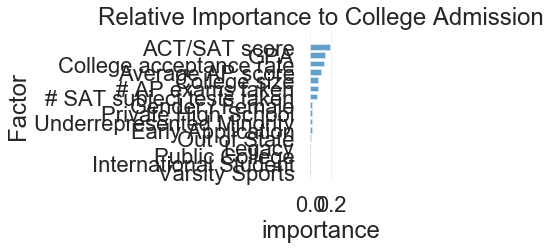

In [56]:
# create interpretable labels for the columns
better_labels = {
    "admissionstest": "ACT/SAT score",
    "acceptrate": "College acceptance rate",
    "GPA": "GPA",
    "averageAP": "Average AP score",
    "size": "College size",
    "AP": "# AP exams taken",
    "SATsubject": "# SAT subject tests taken",
    "female": "Gender / Female",
    "schooltype": "Private High School",
    "MinorityRace": "Underrepresented Minority",
    "earlyAppl": "Early Application",
    "outofstate": "Out of State",
    "public": "Public College",
    "alumni": "Legacy",
    "international": "International Student",
    "sports": "Varsity Sports"
    }
# create dictionary of feature importances
dfpredict1 = dfpredict.drop("intendedgradyear",axis=1)
X1 = imp.transform(dfpredict1)
y1 = dfresponse
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100,criterion="gini")
clf.fit(X_train1,y_train1)
feature_importance = {}
for i in range(len(dfpredict1.columns)):
    feature_importance[better_labels[dfpredict1.columns[i]]] = clf.feature_importances_[i]
# plot sorted importances
sns.set_style("white")
plt.barh(range(len(dfpredict1.columns)),sorted(feature_importance.values()), align="center",alpha=0.7,edgecolor='white')
plt.ylim([-1,17])
plt.yticks(range(len(dfpredict1.columns)), sorted(feature_importance,key=feature_importance.get))
plt.ylabel("Factor")
plt.xlabel("importance")
plt.title("Relative Importance to College Admission")
plt.gca().yaxis.grid(False)
plt.gca().xaxis.grid(True,color='0.95')
plt.tight_layout()
sns.despine(left=True,bottom=True)
plt.savefig("features.png")
plt.show()

In [70]:
### test a candidate's chances for each college

candidate = [0.926899206,7,1.06733864,
             3,-0.187109979,0,1,
             0,0,1,0,0,
             0]
college_cols = ["acceptrate","size","public"]
colleges = ti.College()
preds = []
for i, row in colleges.df.iterrows():
    Xp1 = candidate + list(row[college_cols])
    y_rf = clfRF.predict_proba([Xp1])[0][1]
    p =  {'college':row.collegeID, 'prob':y_rf}
    preds.append(p)
    
preds   

[{'college': 'Princeton', 'prob': 0.334},
 {'college': 'Harvard', 'prob': 0.24},
 {'college': 'Yale', 'prob': 0.306},
 {'college': 'Columbia', 'prob': 0.36},
 {'college': 'Stanford', 'prob': 0.245},
 {'college': 'UChicago', 'prob': 0.551},
 {'college': 'MIT', 'prob': 0.384},
 {'college': 'Duke', 'prob': 0.508},
 {'college': 'UPenn', 'prob': 0.327},
 {'college': 'CalTech', 'prob': 0.472},
 {'college': 'JohnsHopkins', 'prob': 0.587},
 {'college': 'Dartmouth', 'prob': 0.523},
 {'college': 'Northwestern', 'prob': 0.6726666666666667},
 {'college': 'Brown', 'prob': 0.472},
 {'college': 'Cornell', 'prob': 0.598},
 {'college': 'Vanderbilt', 'prob': 0.688},
 {'college': 'WashU', 'prob': 0.681},
 {'college': 'Rice', 'prob': 0.741},
 {'college': 'NotreDame', 'prob': 0.718},
 {'college': 'UCB', 'prob': 0.739},
 {'college': 'Emory', 'prob': 0.712},
 {'college': 'Georgetown', 'prob': 0.671},
 {'college': 'CarnegieMellon', 'prob': 0.786},
 {'college': 'UCLA', 'prob': 0.773},
 {'college': 'USC', 'prob

In [72]:
import pickle



filename = 'finalized_model.sav'
pickle.dump(clfRF, open(filename, 'wb'))

In [74]:
loaded_model = pickle.load(open(filename, 'rb'))

In [75]:
candidate = [0.926899206,7,1.06733864,
             3,-0.187109979,0,1,
             0,0,1,0,0,
             0]
college_cols = ["acceptrate","size","public"]
colleges = ti.College()
preds = []
for i, row in colleges.df.iterrows():
    Xp1 = candidate + list(row[college_cols])
    y_rf = loaded_model.predict_proba([Xp1])[0][1]
    p =  {'college':row.collegeID, 'prob':y_rf}
    preds.append(p)
    
preds   

[{'college': 'Princeton', 'prob': 0.334},
 {'college': 'Harvard', 'prob': 0.24},
 {'college': 'Yale', 'prob': 0.306},
 {'college': 'Columbia', 'prob': 0.36},
 {'college': 'Stanford', 'prob': 0.245},
 {'college': 'UChicago', 'prob': 0.551},
 {'college': 'MIT', 'prob': 0.384},
 {'college': 'Duke', 'prob': 0.508},
 {'college': 'UPenn', 'prob': 0.327},
 {'college': 'CalTech', 'prob': 0.472},
 {'college': 'JohnsHopkins', 'prob': 0.587},
 {'college': 'Dartmouth', 'prob': 0.523},
 {'college': 'Northwestern', 'prob': 0.6726666666666667},
 {'college': 'Brown', 'prob': 0.472},
 {'college': 'Cornell', 'prob': 0.598},
 {'college': 'Vanderbilt', 'prob': 0.688},
 {'college': 'WashU', 'prob': 0.681},
 {'college': 'Rice', 'prob': 0.741},
 {'college': 'NotreDame', 'prob': 0.718},
 {'college': 'UCB', 'prob': 0.739},
 {'college': 'Emory', 'prob': 0.712},
 {'college': 'Georgetown', 'prob': 0.671},
 {'college': 'CarnegieMellon', 'prob': 0.786},
 {'college': 'UCLA', 'prob': 0.773},
 {'college': 'USC', 'prob